# Get Sector Performace Percentages
This script needs to get the percentages of every stock in the market for 2020.

*   get jan 1 2020 stock price - dec 31, 2020 stock price
*   get sector name, add stocks percentage + to sector name
*   add stock to sector's total number of stocks in sector
*   divide total percentage by num stocks in sector
*   plot all sectors that surpass min threshold increase



In [1]:
#install finnhub package
!pip install finnhub-python
!pip install alpha_vantage
!pip install anvil-uplink


     |████████████████████████████████| 1.3MB 7.0MB/s 
     |████████████████████████████████| 296kB 46.1MB/s 
     |████████████████████████████████| 143kB 34.5MB/s 
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3163 sha256=7536faec50b5e80487188738490918c0bf638d69ae5f15671b4a313520a0d20c
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built idna-ssl
     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-cp36-none-any.whl size=45216 sha256=8fe32bac1fba4b77994e027088156c8d101b78579d43448318690e6d3d1758ae
  Stored in directory: /root/.cache/pip/wheels/a2/6e/4e/8b0ae12fb9b8a05715256952cf7609a8ab86285fab99b88c68
Successfully built ws4py


In [1]:
my_finnhub_api_key = "bsu3fpv48v6r5qhbp2ug"
my_alphavantage_api_key = "d2d5b4fd11msh809929aba83350ap17c13djsnb5fc962257e5"

#anvil uplink key
anvil_uplink_key = "FNJ2W74SVK2W7PNEAIR6ITBQ-SV25MJSUAXS432NY"

In [2]:
import http.client
#import anvil.server

#anvil.server.connect(anvil_uplink_key)

conn = http.client.HTTPSConnection("alpha-vantage.p.rapidapi.com")

headers = {
    'x-rapidapi-key': my_alphavantage_api_key,
    'x-rapidapi-host': "alpha-vantage.p.rapidapi.com"
    }

conn.request("GET", "/query?function=SECTOR", headers=headers)

res = conn.getresponse()
data = res.read()



In [3]:
print(data.decode("utf-8"))

{
    "Meta Data": {
        "Information": "US Sector Performance (realtime & historical)",
        "Last Refreshed": "2021-02-11 19:41:10 US/Eastern"
    },
    "Rank A: Real-Time Performance": {
        "Information Technology": "1.09%",
        "Health Care": "0.16%",
        "Materials": "0.14%",
        "Communication Services": "0.04%",
        "Real Estate": "-0.11%",
        "Industrials": "-0.20%",
        "Financials": "-0.22%",
        "Consumer Discretionary": "-0.30%",
        "Consumer Staples": "-0.43%",
        "Utilities": "-0.72%",
        "Energy": "-1.52%"
    },
    "Rank B: 1 Day Performance": {
        "Energy": "1.84%",
        "Communication Services": "0.63%",
        "Real Estate": "0.60%",
        "Utilities": "0.39%",
        "Health Care": "0.17%",
        "Financials": "-0.06%",
        "Consumer Staples": "-0.14%",
        "Information Technology": "-0.15%",
        "Industrials": "-0.16%",
        "Materials": "-0.20%",
        "Consumer Discretionary"

In [4]:
from alpha_vantage.sectorperformance import SectorPerformances
import pandas as pd
import matplotlib.pyplot as plt

#Pie Chart of 1 Year Sector Performance
colors = ['g','r','y','b','m','orange','turquoise','goldenrod','rebeccapurple','darkgray','maroon']


sp = SectorPerformances(key=my_alphavantage_api_key, output_format='pandas')
data, meta_data = sp.get_sector()

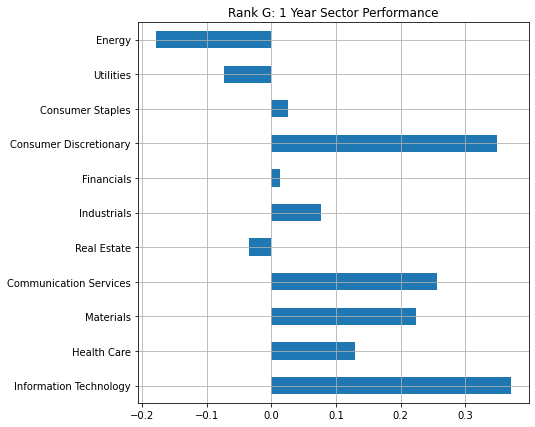

In [5]:
plt.figure(figsize=(7,7))
data['Rank G: Year Performance'].plot(kind='barh')
plt.title('Rank G: 1 Year Sector Performance')
plt.grid()
plt.show()

In [6]:
#print(data['Rank G: Year Performance'])
print(max(data['Rank G: Year Performance']))
print('\n')
for x in data['Rank G: Year Performance']:
  print(x)

0.3703


0.3703
0.1286
0.2238
0.2564
-0.034300000000000004
0.0766
0.013000000000000001
0.34869999999999995
0.0259
-0.0738
-0.1789


In [ ]:
from alpha_vantage.techindicators import TechIndicators
import anvil.mpl_util

#plotting bbbands with:
#relative strength index(rsi), 
#volume based indicators: intraday intensity index, accumulation/distribution index

#initiate TechInidactors api to be able to pull tech indicators
ti = TechIndicators(key=my_alphavantage_api_key, output_format='pandas')

@anvil.server.callable
def calculateBBands(ticker):
  data_bbands, meta_data_bbands = ti.get_bbands(symbol=ticker, interval='60min', time_period=60)
  timeList = data_bbands.index.to_list()
  realLower = data_bbands['Real Lower Band'].to_list()
  realUpper = data_bbands['Real Upper Band'].to_list()
  realMiddle = data_bbands['Real Middle Band'].to_list()
  return timeList, realLower, realMiddle, realUpper

@anvil.server.callable
def plotBBands(ticker):
  plt.figure(figsize=(25,5))
  plt.plot(calculateBBands(ticker))
  plt.title('BBands indicator for {} stock (60 min)'.format(ticker))
  plt.grid()
  plt.tight_layout()
  # Return this plot as a PNG image in a Media object
  return anvil.mpl_util.plot_image()

@anvil.server.callable
def calculateRSI(ticker):
  data_rsi, meta_data_rsi = ti.get_rsi(symbol=ticker, interval='60min', time_period=60)
  timeList = data_rsi.index.to_list()
  rsiList = data_rsi['RSI'].to_list()
  return timeList, rsiList

@anvil.server.callable
def calculateVWAP(ticker):
  data_vwap, meta_data_vwap = ti.get_vwap(symbol=ticker, interval='1min')
  timeList = data_vwap.index.to_list()
  vwapList = data_vwap['VWAP'].to_list()
  return timeList, vwapList

@anvil.server.callable
def plotVWAP(ticker, data_vwap):
  plt.plot(data_vwap)
  plt.title('VWAP indicator for {} stock (1 min)'.format(ticker))
  plt.grid()
  plt.tight_layout()
  # Return this plot as a PNG image in a Media object
  return anvil.mpl_util.plot_image()



# learning to iterate through a dataframe
# print(data_bbands)

timeList = data_bbands.index.to_list()
realLower = data_bbands['Real Lower Band'].to_list()
realUpper = data_bbands['Real Upper Band'].to_list()
realMiddle = data_bbands['Real Middle Band'].to_list()


fig = sendBBandsPlot('TSLA')
fig.show()

data_rsi, meta_data_rsi = ti.get_rsi(symbol="AAPL", interval='60min', time_period=60)
print(data_rsi)


NameError: ignored

In [ ]:
plotBBands("AAL")
plotRSI('AAL')

NameError: ignored

In [ ]:
# #using plotly 
# from IPython.display import HTML
# import plotly.express as px

# df = px.data.iris()
# display(df.head())
# fig = px.scatter(df, x="sepal_width", y="sepal_length")
# HTML(fig.to_html())

In [ ]:
#keep at the end of the notebook forever
anvil.server.wait_forever()